# **Spotify Song Genre Prediction**
#### **DSCI 100 Section 007**
#### **Group 5 Project Proposal**

Feature Descriptions: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

## Introduction

blah blah blah
* variable description
* variable description
....

## Exploratory Data Analysis

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
song_data <- read_csv("https://github.com/aidanmeharg/dsci-100-2022W2-group-5/raw/main/data/SpotifyFeatures.csv")

song_data <- song_data |>
    mutate(genre = as_factor(genre)) |> 
    mutate(key = as_factor(key)) |>
    mutate(time_signature = as_factor(time_signature)) |>
    mutate(mode = as_factor(mode))

song_data

Rows: 232725 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): genre, artist_name, track_name, track_id, key, mode, time_signature
dbl (11): popularity, acousticness, danceability, duration_ms, energy, instr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.0329,0.785,282447,0.683,8.80e-04,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.9010,0.517,166960,0.419,0.00e+00,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.2620,0.745,222442,0.704,0.00e+00,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35,0.0973,0.758,323027,0.470,4.89e-05,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


### Check for Songs Classified Under Multiple Genres

copies,count
<int>,<int>
1,141650
2,21871
3,8091
4,3374
5,1300
6,358
7,124
8,6


[1] 176774

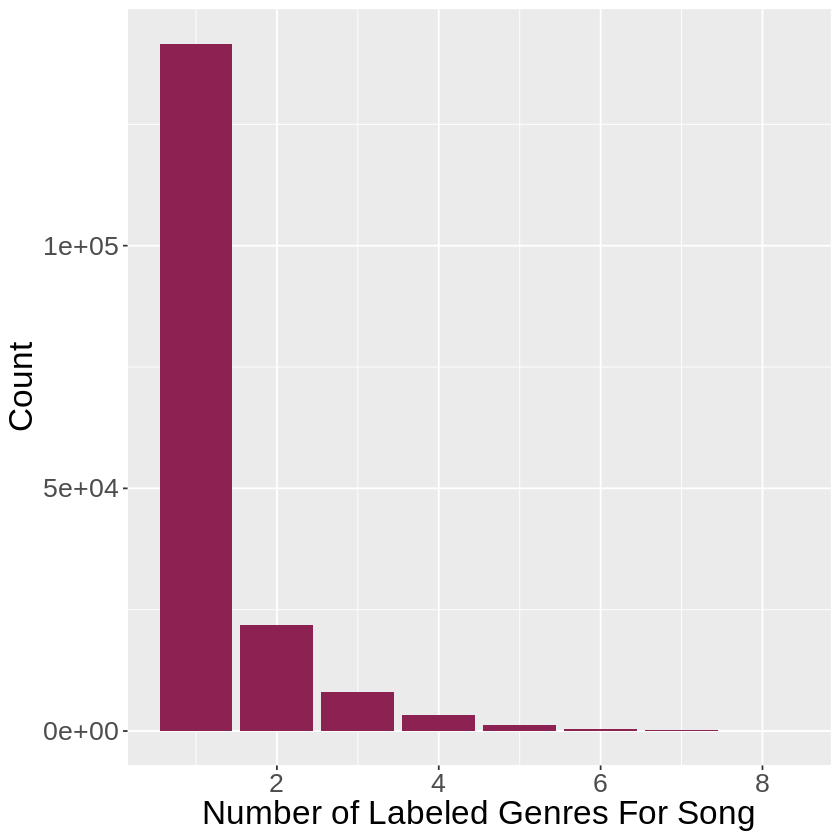

In [4]:
song_copies <- song_data |>
    group_by(track_id) |>
    summarize(copies = n()) |>
    arrange(desc(copies)) 

song_copy_counts <- song_copies |>
    group_by(copies) |>
    summarize(count = n())

num_unique_track_ids <- song_copy_counts |>
    select(count) |>
    pull() |>
    sum()

song_copy_counts
num_unique_track_ids

ggplot(song_copy_counts, aes(copies, count))+
    geom_bar(stat = "identity", fill = "violetred4")+
    labs(x = "Number of Labeled Genres For Song", y = "Count")+
    theme(text = element_text(size = 20))

There are a total of 176,774 unique tracks in this dataset. Of those tracks, 141,650 (~80%) fall under a single genre classification while the rest appear in as many as eight different genres! Having songs that fall into multiple genres will complicate the classification process, so for this project we decided to only use songs with one assigned genre.

In [5]:
multi_genre_songs <- song_copies |>
    filter(copies > 1) |>
    select(track_id) |>
    pull()

song_data <- song_data |>
    filter(!(track_id %in% multi_genre_songs))

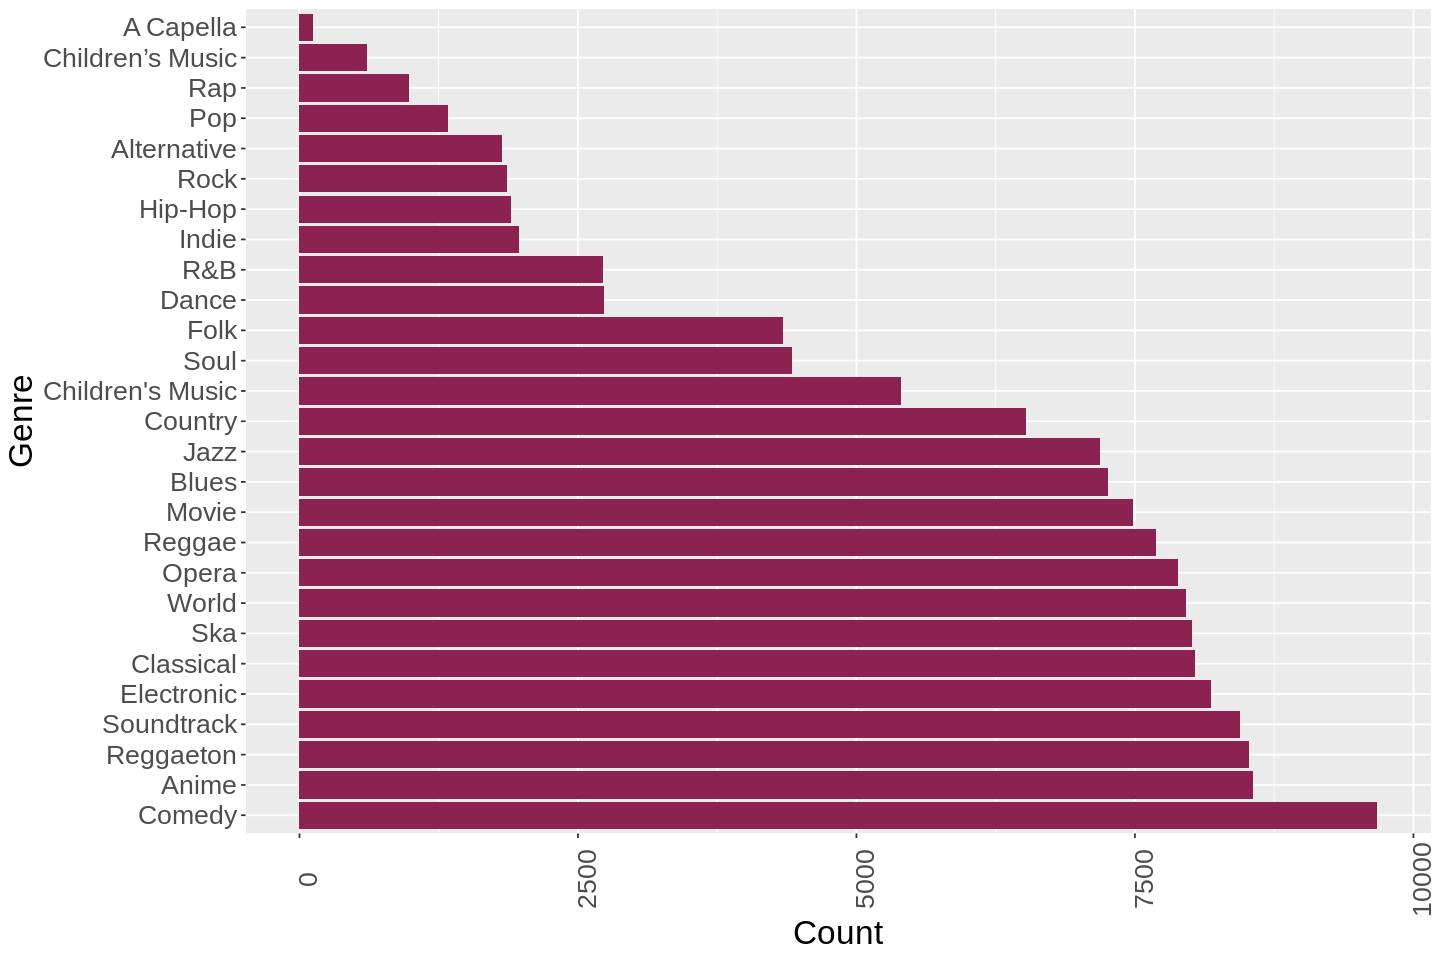

In [6]:
options(repr.plot.height = 8, repr.plot.width = 12)

genre_plot <- song_data |>
    group_by(genre) |>
    summarize(count = n()) |>
    ggplot(aes(reorder(genre, -count), count))+
        geom_bar(stat = "identity", fill = "violetred4")+
        labs(x = "Genre", y = "Count")+
        coord_flip()+
        theme(text = element_text(size = 20), axis.text.x = element_text(angle = 90))

genre_plot

As seen on the last graph there is a problem regarding the genre of Children's Music as it seems to be classified into two genres because of the apostrophe. One is Children's Music and the other is Children’s Music, we will correct this and put both of them under the same category as they should belong. We also remove A Capella songs from our analysis entirely due to a very low number of observations.

In [7]:
#Checking how many songs and genrea are in the data set
Original_number_Of_songs <-nrow(song_data)
Original_number_Of_Genere <- song_data |>
                            group_by(genre) |>
                            summarize(count = n()) |> 
                            nrow()
print(paste("Number of Rows of the original data set: ", Original_number_Of_songs))
print(paste("Number of genres of the original Data set: ", Original_number_Of_Genere))
#We select one of the two genre classify as children songs and mutate them to the other name of Children's Music
selectingOneTypeOfChildrensSong <- song_data |>
                                filter(genre=="Children’s Music") |>
                                mutate(genre="Children's Music")

#We delete that said genre from the original data set
song_data <- song_data |> 
            filter(genre!="Children’s Music")


[1] "Number of Rows of the original data set:  141650"
[1] "Number of genres of the original Data set:  27"


In [8]:
#We merge both of them into one data set
song_data <-add_row(song_data, selectingOneTypeOfChildrensSong)

#Confirm they have the same number of rows
New_number_of_songs<-nrow(song_data)
print(paste("Number of Rows of the new data set: ", New_number_of_songs))
#Confirm the have one genre less
New_number_Of_Genere <- song_data |>
                            group_by(genre) |>
                            summarize(count = n()) |>
                            nrow()
print(paste("Number of genres of the new Data set: ", New_number_Of_Genere))

[1] "Number of Rows of the new data set:  141650"
[1] "Number of genres of the new Data set:  26"


In [9]:
# Remove the A Capella songs (too few observations!)
song_data <- song_data |>
    filter(genre != "A Capella")

### Training / Testing Split

**Don't Forget To Run This**

In [10]:
set.seed(1738)

In [11]:
song_split <- initial_split(song_data, prop = 0.75, strata = genre)
song_train <- training(song_split)
song_test <- testing(song_split)

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


**Not sure why this warning message keeps occurring.**
The splits appear to keep original proportions quite well...

In [12]:
colSums(is.na(song_train))

genre      artist_name       track_name         track_id 
               0                0                0                0 
      popularity     acousticness     danceability      duration_ms 
               0                0                0                0 
          energy instrumentalness              key         liveness 
               0                0                0                0 
        loudness             mode      speechiness            tempo 
               0                0                0                0 
  time_signature          valence 
               0                0

There appear to be no missing (NA) values in our training set.

In [13]:
continuous_predictors <- song_train |>
    select(acousticness:valence) |>
    select(-c("key", "mode", "time_signature")) 

summary_table <- apply(continuous_predictors, 2,  summary)

summary_table

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Min.,0.0000010,0.0569000,16316.0,0.0000980,0.0000000,0.010200,-52.45700,0.0222000,30.37900,0.0000000
1st Qu.,0.0543000,0.3970000,173186.2,0.3090000,0.0000000,0.097600,-13.80900,0.0370000,91.13275,0.2070000
Median,0.3550000,0.5460000,218667.0,0.5800000,0.0001110,0.132000,-8.64600,0.0491000,114.24400,0.4370000
Mean,0.4365578,0.5286911,236980.8,0.5455903,0.1929402,0.234763,-10.64299,0.1351841,116.75850,0.4494912
3rd Qu.,0.8310000,0.6740000,271673.8,0.7930000,0.1930000,0.292000,-5.76800,0.0995000,138.22500,0.6750000
Max.,0.9960000,0.9890000,5488000.0,0.9990000,0.9990000,1.000000,1.61000,0.9670000,242.90300,1.0000000


We can see that most of the continuous features created by spotify have been normalized via min-max scaling, as they are in the interval [0,1] (they have not been zero-centered however). Tempo, loudness, and duration have not been scaled or centered.

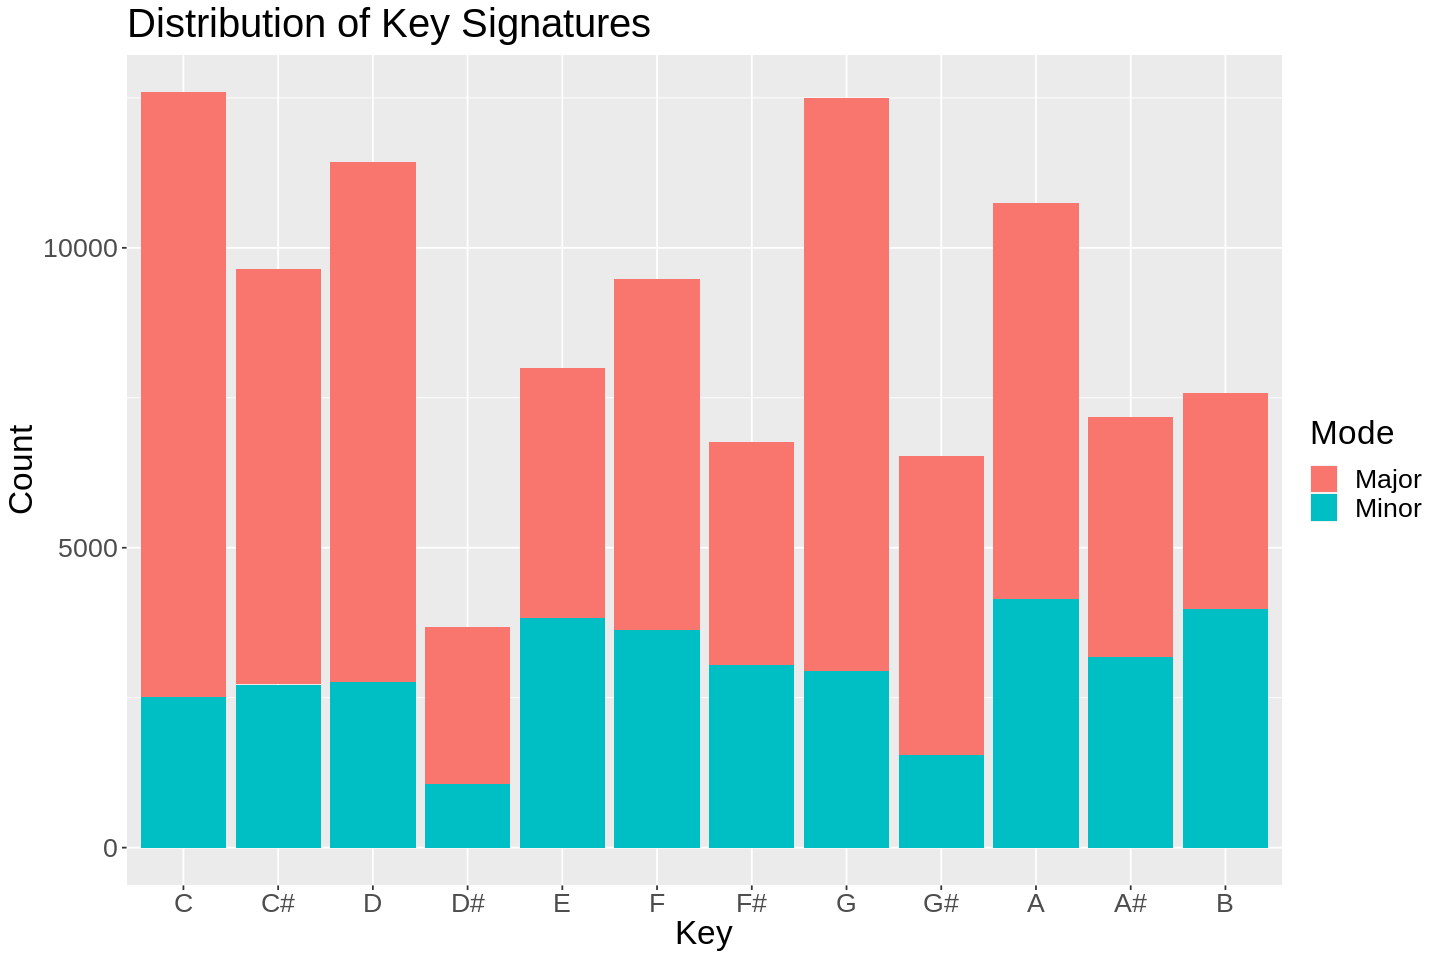

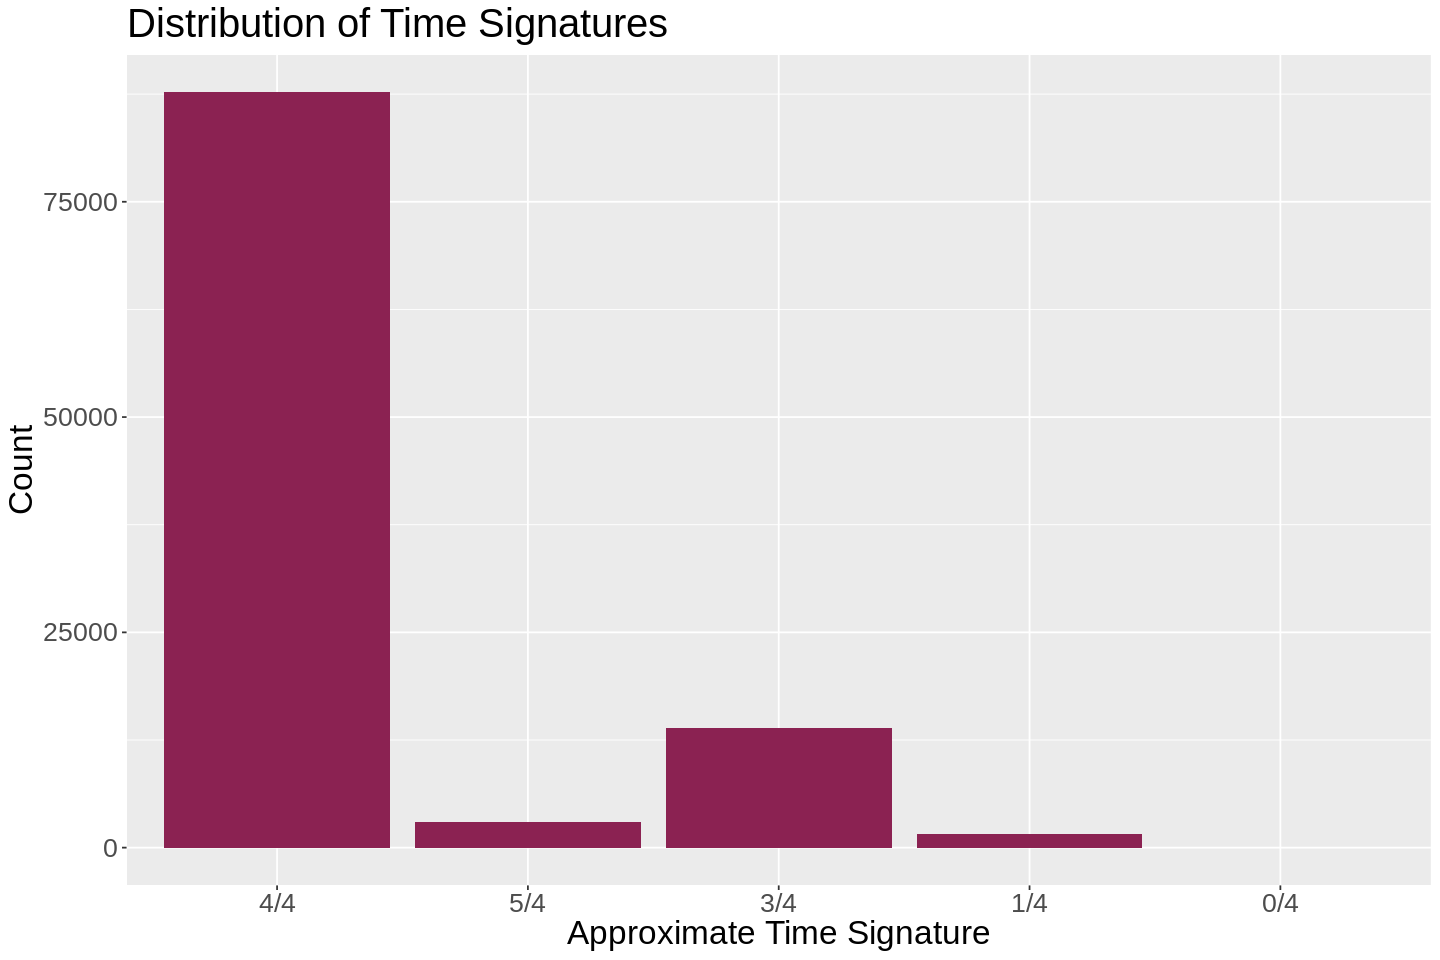

In [14]:
categorical_predictors <- song_train |>
    select(c("key", "mode", "time_signature"))

categorical_predictors$key <- fct_relevel(categorical_predictors$key, "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B")

key_plot <- categorical_predictors |>
    group_by(key, mode) |>
    tally() |>
    ggplot(aes(key, n, fill = mode)) +
        geom_bar(stat = "identity") +
        labs(x = "Key", y = "Count", fill = "Mode")+
        ggtitle("Distribution of Key Signatures")+
        theme(text = element_text(size = 20))

time_sig_plot <- categorical_predictors |>
    group_by(time_signature) |>
    tally() |>
    ggplot(aes(time_signature, n)) +
        geom_bar(stat = "identity", fill = "violetred4") +
        labs(x = "Approximate Time Signature", y = "Count") +
        ggtitle("Distribution of Time Signatures")+
        theme(text = element_text(size = 20))

key_plot
time_sig_plot

The description of time_signature from Spotify web API indicates that time signatures should range from 3/4 to 7/4, so it is concerning that there are some songs classified under 1/4 and 0/4. It is unclear what the dataset creator has done to alter the values obtained from the Spotify API.

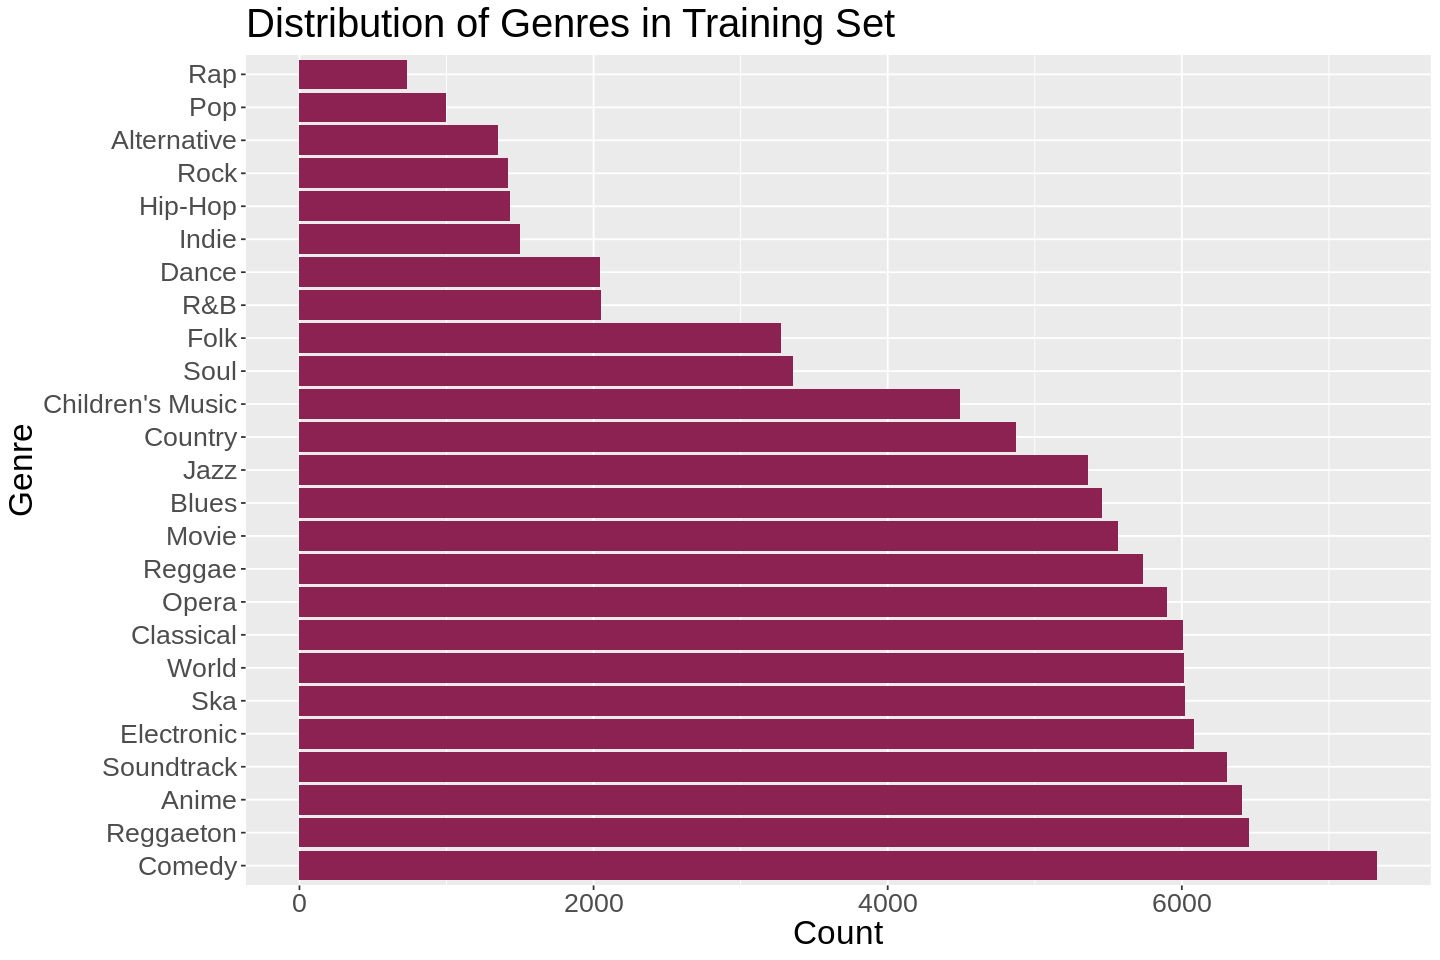

In [15]:
genre_dist_plot <- song_train |>
    group_by(genre) |>
    summarize(count = n()) |>
    ggplot(aes(reorder(genre, -count), count))+
        geom_bar(stat = "identity", fill = "violetred4")+
        labs(x = "Genre", y = "Count")+
        ggtitle("Distribution of Genres in Training Set")+
        coord_flip()+
        theme(text = element_text(size = 20))

genre_dist_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



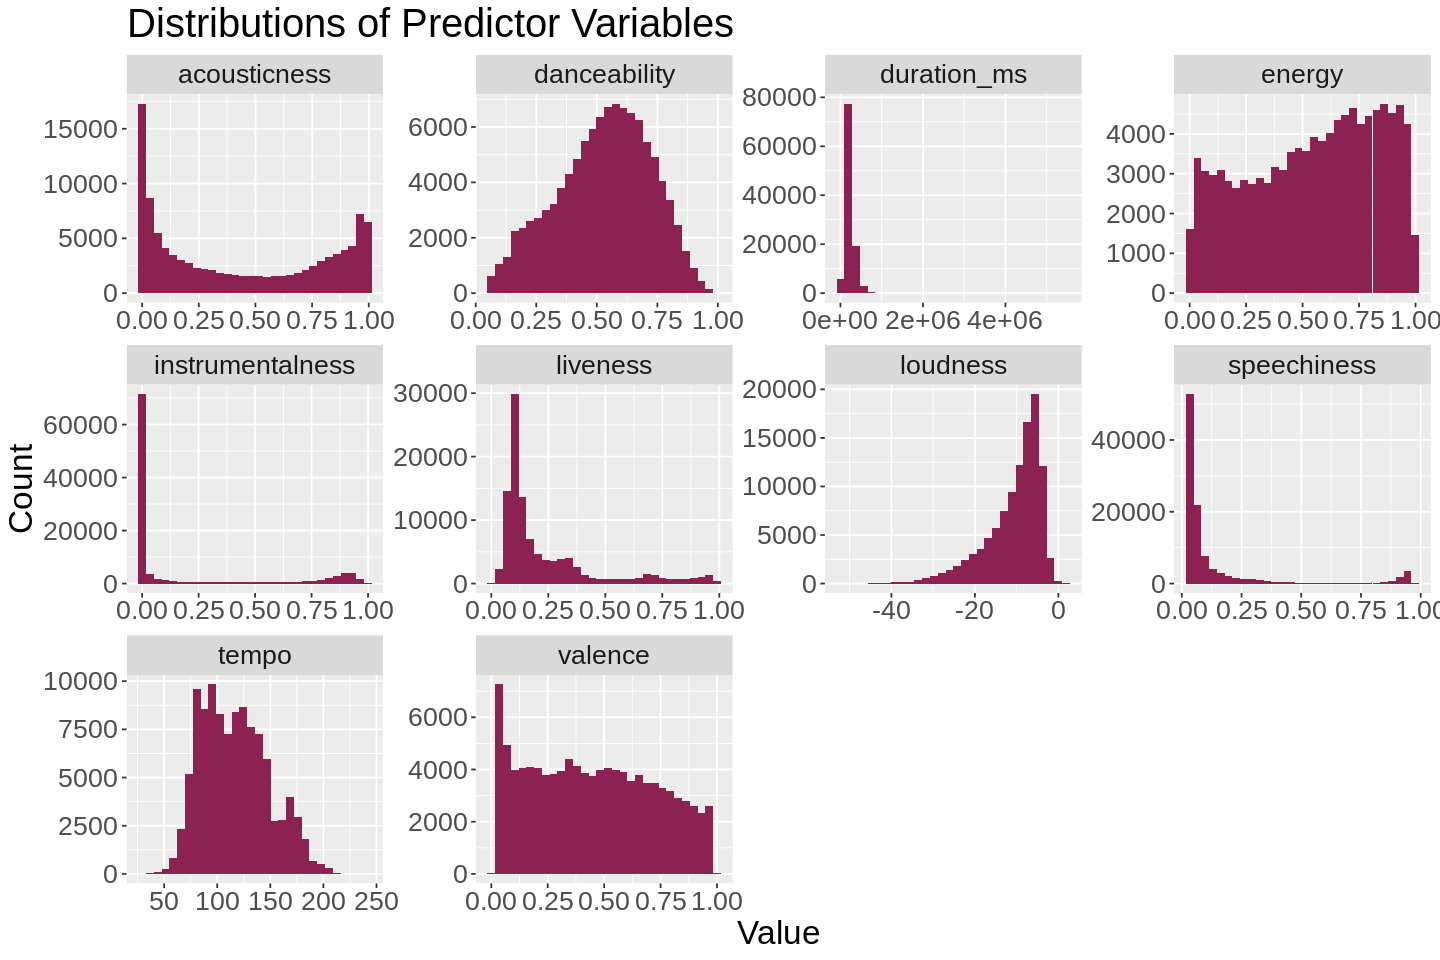

In [31]:
options(repr.plot.height = 8, repr.plot.width = 12)

continuous_long <- continuous_predictors |>
    pivot_longer(colnames(continuous_predictors))

density_plots <- continuous_long |>
    ggplot(aes(value)) +
        geom_histogram(fill = "violetred4") +
        facet_wrap(~name, scales = "free")+
        labs(x = "Value", y = "Count") +
        ggtitle("Distributions of Predictor Variables") + 
        theme(text = element_text(size = 20))

density_plots

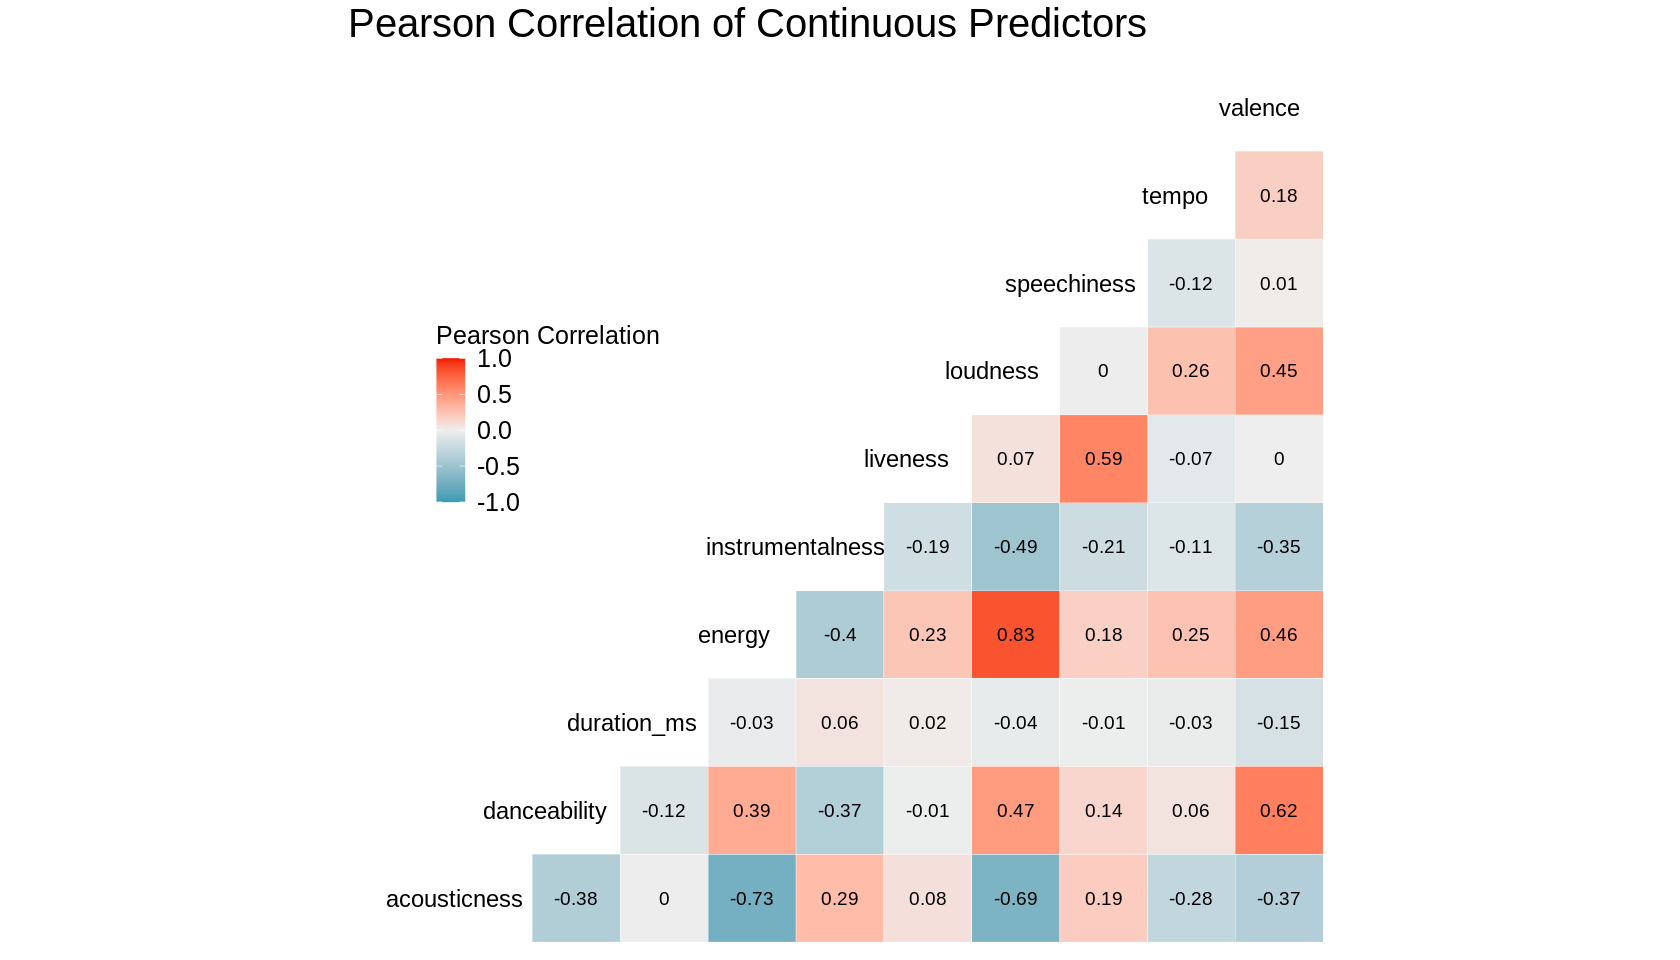

In [77]:
options(repr.plot.height = 8, repr.plot.width = 14)

ggcorr(continuous_predictors, method = c("pairwise", "pearson"), hjust = 0.75, size = 5, layout.exp = 1,
      label = TRUE, label_round = 2, legend.position = c(0.2, 0.6), name = "Pearson Correlation", legend.size = 15)+
        ggtitle("Pearson Correlation of Continuous Predictors")+
        theme(text = element_text(size = 20))

## Methods

- We will do classification using k nearest neighborhood, but to accurately predict these we will have to get rid of variables that do not contribute anything useful for the model:
    - Track_id: It is a identifier not useful. 
    - Track_name: Does not help the model as having the same name does not represent anything special.  
    - Artist_name: Having the same artist, does not guarantee you are going to have the same genre, bands like linking park used to be a rock band now it is a pop band.  
    - Popularity: That a song is popular does not have to be allign to any genrea, there could be mediatic or other reasons for it.  
    - Liveness: Havin people on the audio does not help, as any song can be put into a concert and be classify as lively.  
    - mode: As a binary classification, it does not tell you where in the scale the song is, it could Major F or Major A or Major C, which are quite different.

### Visualization:
- A great wauy to vizualize teh result is to have a bar graph or percent of songs we accurately predict based on genre to see if the model was better or worse for specific genre 

## Expected Outcomes + Significance

**What do you expect to find?**

From this analysis we expect to create a classification system that is able to accurately sort songs into a specific genre based on their audio features.

**What impact could such findings have?**

Creating and testing music genre classification models is extremely important for music streaming platforms, such as Spotify, whose song recommendation systems partially rely on “content-based filtering” (Pastukhov, 2022). Hence, by creating and optimizing a genre classifications system using content-based data, such as raw audio features, we can possibly improve song recommendations for users. Our classification model may also help improve artist discoverability, as according to Spotify, 33% of new artist discoveries happen via personalized music recommendations ("Learn How Fans").

**What future questions could this lead to?**

Some questions include:

* What features aside from audio features can be used to accurately classify music genres? For example, do songs that commonly appear in the same types of playlists typically have the same genre? If yes, can we use this playlist data to classify songs?
* How can these genre classifications be used to recommend new music to users?
* How effective are these music recommendations? Do users (survey data) like the music recommendation system?


### References

* Learn How Fans Discover Your Music on Spotify with New “Made to Be Found” Site and “Source of Streams” Stats – Spotify for Artists. (n.d.). Artists.spotify.com. Retrieved March 11, 2023, from https://artists.spotify.com/en/blog/how-fans-discover-music-on-spotify-playlists-made-to-be-found

* Pastukhov, D. (2022, February 9). Inside Spotify’s Recommender System: A Complete Guide to Spotify Recommendation Algorithms. Www.music-Tomorrow.com. https://www.music-tomorrow.com/blog/how-spotify-recommendation-system-works-a-complete-guide-2022